# Проект: Исследование стартапов


- Автор: Хасанов Ильмир
- Дата: 19.02.2025 (дата начала)

## Введение

Финансовая компания, специализирующаяся на предоставлении льготных займов стартапам, стремится расширить свои горизонты и выйти на инвестиционный рынок. Основная цель — приобретение, развитие и последующая перепродажа перспективных стартапов. Для успешного запуска этой новой бизнес-модели необходимо глубокое понимание рынка стартапов, а также факторов, влияющих на их успешность и стоимость.

Внутренние попытки провести исследование на исторических данных не увенчались успехом из-за отсутствия квалифицированных аналитиков в команде. Поэтому компания решила привлечь аутсорс-специалистов для выполнения этой задачи. Однако данные, доступные для анализа, неполные и могут содержать искажения, что требует особого внимания к интерпретации результатов.


Цель проекта заключается в подготовке качественного датасета и проверке его соответствия здравому смыслу, а также в ответах на ключевые вопросы заказчика, касающиеся предобработки данных и их значимости для бизнеса. В рамках проекта необходимо:

1. Подготовить датасет: Объединить данные из различных таблиц, обеспечив целостность и согласованность информации.
2. Оценить достоверность данных: Проверить, насколько можно доверять информации о сотрудниках стартапов и их образовании, а также проанализировать аномалии, такие как покупки за 0 или 1 доллар.
3. Анализировать стоимость стартапов: Исследовать, как цена стартапа зависит от его категории и количества раундов финансирования перед покупкой.
4. Рассчитать и визуализировать показатели: Определить численные показатели и динамику, которые помогут в принятии инвестиционных решений.
5. Выявить ключевые признаки успешности: Постараться найти показатели и признаки, которые могут указывать на повышенную вероятность успешной сделки по покупке компании.

Таким образом, проект направлен на создание надежной аналитической базы, которая позволит компании принимать обоснованные инвестиционные решения и минимизировать риски при выходе на новый рынок.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

In [1]:
# Импортируем необходимую библиотеку
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


* Загрузите все данные по проекту.

In [2]:
# Загружаем все данные
acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

In [3]:
pd.set_option('mode.chained_assignment', None)


* Проверьте названия столбцов.

In [4]:
# Названия столбцов в датафрейме acquisition
acquisition.columns

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [5]:
# Названия столбцов в датафрейме company_and_rounds
company_and_rounds.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [6]:
# Приводим названия столбцов к snake case
company_and_rounds_rename = company_and_rounds.rename(columns = {'company  ID': 'company_id', 'category  code': 'category_code','founded  at': 'founded_at',
       'closed  at': 'closed_at', 'network  username': 'network_username', 'country  code': 'country_code',
       'investment  rounds': 'investment_rounds', 'funding  rounds': 'funding_rounds', 'funding  total': 'funding_total',
       'funding  round  id': 'funding_round_id', 'company  id': 'company_id_2', 'funded  at': 'funded_at',
       'funding  round  type': 'funding_round_type', 'raised  amount': 'raised_amount', 'pre  money  valuation': 'pre_money_valuation', 
        'is  first  round': 'is_first_round', 'is  last  round': 'is_last_round'})
company_and_rounds_rename.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [7]:
# Подсчет количества вхождений каждого названия столбца
company_and_rounds_rename.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [8]:
# Названия столбцов в датафрейме
degrees.columns

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

In [9]:
# Названия столбцов в датафрейме
education.columns

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

In [10]:
# Названия столбцов в датафрейме
fund.columns

Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

In [11]:
# Названия столбцов в датафрейме
investment.columns

Index(['id', 'funding_round_id', 'company_id', 'fund_id'], dtype='object')

In [12]:
# Названия столбцов в датафрейме
people.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

Проверили названия столбцов и пришли к выводу, что названия хорошо передают суть данных. К стилю snake cake приведены названия столбцов только одного датафрейма company_and_rounds. переименован столбец company_id из-за дублирования


* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [13]:
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [14]:
# Выводим первые 5 строк
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [15]:
# Выводим уникальные в датафрейме acquisition
for column in acquisition.columns:
    print(f'Уникальные значения в столбце {column}:')
    print(acquisition[column].sort_values().unique())

Уникальные значения в столбце id:
[    1     7     8 ... 10527 10528 10529]
Уникальные значения в столбце acquiring_company_id:
[     4      5     11 ... 285921 285968 285984]
Уникальные значения в столбце acquired_company_id:
[     4      8      9 ... 285995 286006 286176]
Уникальные значения в столбце term_code:
['cash' 'cash_and_stock' 'stock' nan]
Уникальные значения в столбце price_amount:
[            0             1            11 ...   35000000000   39000000000
 2600000000000]
Уникальные значения в столбце acquired_at:
['1966-03-24' '1967-04-07' '1977-01-01' ... '2013-12-11' '2013-12-12' nan]


Данные в столбцах датафрейма acquisition, которые имеют пропуски и ошибки:
1. term_code (варианты расчета) - варианты расчёта имеют пропуски. Нужно привести к категориальному типу данных. Если данные для этого столбца не были собраны или не были введены, он будет пустым. Это может произойти, если информация не была доступна на момент сбора данных.
2. price_amount (сумма сделки) - в уникальных значениях имеются покупки за 0 и 1. тогда как максимальное значение достигает два триллиона шестьсот миллиардов, что очень много. Нужно будет проверить столбец на корректность данных.
3. acquired_at (дата сделки) - имеет пропуски. Если данные собирались вручную или через автоматизированные системы, могли произойти ошибки, которые привели к пропуску даты сделки. Это может быть связано с человеческим фактором или сбоями в программном обеспечении.

In [16]:
company_and_rounds_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id_2         52928 non-null   float64
 15  funded_at        

In [17]:
for column in company_and_rounds_rename.columns:
    print(f'Уникальные значения в столбце {column}:')
    print(company_and_rounds_rename[column].sort_values().unique())

Уникальные значения в столбце company_id:
[1.00000e+00 2.00000e+00 3.00000e+00 ... 2.86213e+05 2.86215e+05
         nan]
Уникальные значения в столбце name:
['! Haz Life' '!mpossible'
 '!nterprise Network Services - US West Communications' ... 'Übermind'
 'óga' nan]
Уникальные значения в столбце category_code:
['advertising' 'analytics' 'automotive' 'biotech' 'cleantech' 'consulting'
 'design' 'ecommerce' 'education' 'enterprise' 'fashion' 'finance'
 'games_video' 'government' 'hardware' 'health' 'hospitality' 'legal'
 'local' 'manufacturing' 'medical' 'messaging' 'mobile' 'music' 'nanotech'
 'network_hosting' 'news' 'nonprofit' 'other' 'pets' 'photo_video'
 'public_relations' 'real_estate' 'search' 'security' 'semiconductor'
 'social' 'software' 'sports' 'transportation' 'travel' 'web' nan]
Уникальные значения в столбце status:
['acquired' 'closed' 'ipo' 'operating' nan]
Уникальные значения в столбце founded_at:
['1901-01-01' '1902-01-01' '1903-01-01' ... '2014-08-01' '2014-10-01' nan

Данные в столбцах датафрейма company_and_rounds_rename, которые имеют пропуски и ошибки:
1. В датафрейме было 2 столбца с названием company_id. Второй был переименован в company_id_2. По всей видимости это результат объединения.
2. category_code и status можно привести к категориальному типу данных.
3. в столбце founded_at данные начинаются с 1901 года, что точно является ошибкой.
4. в столбцах funding_total и raised_amount имеются данные со значением 0. Возможно, это ошибка.
5. в столбце participants число участников достигает 0, что крайне сомнительно.
6. столбец milestones, is_first_round, is_last_round и participants привести к типу int.

In [18]:
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [19]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [20]:
for column in degrees.columns:
    print(f'Уникальные значения в столбце {column}:')
    print(degrees[column].sort_values().unique())

Уникальные значения в столбце id:
[     1      2      3 ... 109608 109609 109610]
Уникальные значения в столбце object_id:
['p:10' 'p:100006' 'p:100013' ... 'p:99990' 'p:99994' 'p:99997']
Уникальные значения в столбце degree_type:
['!st Class Honors' '"Mini-MBA"' "'A' Levels" ...
 '\x93Diplomkauffrau\x94 degree' '\x96 MBA' nan]
Уникальные значения в столбце subject:
['"Psychology, Religion, and Conflict Negotiations"'
 '( Electrical Engineering), Telecommunications, 3.8/4.0'
 '(1) Marketing, (2) Management' ...
 '| Database Design | Server Administratio'
 '\x95 Bachelor of Commerce, Economics & Law' nan]


Данные в столбцах датафрейма degrees не имеют каких-либо ошибок и выглядят вполне логичными

In [21]:
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [22]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [23]:
for column in education.columns:
    print(f'Уникальные значения столбца {column}:')
    print(education[column].sort_values().unique())

Уникальные значения столбца id:
[     1      2      3 ... 109608 109609 109610]
Уникальные значения столбца person_id:
[     2      3      5 ... 268528 268560 268589]
Уникальные значения столбца instituition:
['"Alexandru Ioan Cuza" University of Iasi'
 '"Babes Bolyai" University of Cluj-Napoca'
 '"Babes-Bolyai" University of Cluj-Napoca' ...
 'Österreichische Schule Budapest' 'Östra Gymnasieskolan' nan]
Уникальные значения столбца graduated_at:
['1920-01-01' '1921-01-01' '1924-01-01' '1929-01-01' '1933-01-01'
 '1941-01-01' '1949-01-01' '1951-01-01' '1952-01-01' '1953-01-01'
 '1954-01-01' '1955-01-01' '1956-01-01' '1957-01-01' '1958-01-01'
 '1959-01-01' '1960-01-01' '1961-01-01' '1962-01-01' '1963-01-01'
 '1964-01-01' '1965-01-01' '1966-01-01' '1967-01-01' '1968-01-01'
 '1969-01-01' '1970-01-01' '1971-01-01' '1972-01-01' '1973-01-01'
 '1974-01-01' '1975-01-01' '1976-01-01' '1977-01-01' '1978-01-01'
 '1979-01-01' '1980-01-01' '1981-01-01' '1982-01-01' '1983-01-01'
 '1984-01-01' '1985-01

Данные в столбцах датафрейма education, которые могут вызывать сомнения:

1. Столбец instituition имеет дубликаты, но это вполне реально, т.к. разные люди могли заканчивать один вуз

In [24]:
fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [25]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [26]:
for column in fund.columns:
    print(f'Уникальные значения столбца {column}:')
    print(fund[column].sort_values().unique())

Уникальные значения столбца id:
[    1     2     3 ... 15096 15097 15098]
Уникальные значения столбца name:
["'RIA Novosti'" '(mt) Ventures' '.406 Ventures' ... 'Östersjöstiftelsen'
 'Østjysk Innovation' nan]
Уникальные значения столбца founded_at:
['1901-01-01' '1902-01-01' '1903-01-01' '1904-01-01' '1905-01-01'
 '1905-06-20' '1906-01-01' '1907-01-01' '1907-05-30' '1908-01-01'
 '1909-01-01' '1910-01-01' '1911-01-01' '1911-02-28' '1911-03-13'
 '1912-01-01' '1913-01-01' '1913-07-01' '1916-01-01' '1917-01-01'
 '1918-01-01' '1918-10-21' '1919-01-01' '1919-11-11' '1920-01-01'
 '1922-01-01' '1922-09-01' '1923-01-01' '1924-01-01' '1925-01-01'
 '1925-11-17' '1926-01-01' '1927-01-01' '1928-01-01' '1929-01-01'
 '1931-01-01' '1932-01-01' '1933-01-01' '1934-01-01' '1935-01-01'
 '1935-08-14' '1936-01-01' '1937-01-01' '1937-08-05' '1938-01-01'
 '1939-01-01' '1939-04-29' '1940-01-01' '1941-01-01' '1941-09-15'
 '1942-01-01' '1943-01-01' '1944-01-01' '1945-01-01' '1946-01-01'
 '1946-08-16' '1946-09-05

Данные в столбцах датафрейма education, которые имеют пропуски или ошибки:
1. founded_at может содержать ошибку, так как дата начала с 1901 года.
2. в столбцах investment_rounds, invested_companies и milestones можно привести данные к необходимой размерности.

In [27]:
investment.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [28]:
investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


In [29]:
for column in investment.columns:
    print(f'Уникальные значения столбца {column}:')
    print(investment[column].sort_values().unique())

Уникальные значения столбца id:
[    1     2     3 ... 61401 61402 61403]
Уникальные значения столбца funding_round_id:
[    1     3     4 ... 57926 57942 57948]
Уникальные значения столбца company_id:
[     1      4      5 ... 286028 286125 286178]
Уникальные значения столбца fund_id:
[    1     2     3 ... 15085 15086 15098]


Данные в столбцах датафрейма investment не вызывают сомнений и в них нет ошибки. 

In [30]:
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [31]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [32]:
for column in people.columns:
    print(f'Уникальные значения столбца {column}:')
    print(people[column].sort_values().unique())

Уникальные значения столбца id:
[     2      3      4 ... 268590 268592 268593]
Уникальные значения столбца first_name:
['"DJ' '"DUSTY"' '"Diane' ... 'Þórarinn' 'Þórlindur' nan]
Уникальные значения столбца last_name:
['!llmind' '"Andy" Bell' '"BJ" Jenkins' ... 'å\x91¨å\x93\x81å\x9d\x87'
 'üzüm' nan]
Уникальные значения столбца company_id:
[1.00000e+00 2.00000e+00 3.00000e+00 ... 2.85996e+05 2.86091e+05
         nan]
Уникальные значения столбца network_username:
['01konceptz' '03199618' '077football' ... 'zz4sheezy' 'zzdoublezz' nan]


Данные в столбцах датафрейма people не вызывают сомнений и в них нет ошибки.

Общий вывод по всем датафреймам.

1. Проверили названия столбцов и пришли к выводу, что названия хорошо передают суть данных. К стилю snake cake приведены названия столбцов только одного датафрейма company_and_rounds. переименован столбец company_id из-за дублирования

Данные в столбцах датафрейма acquisition, которые имеют пропуски и ошибки:

1. term_code (варианты расчета) - варианты расчёта имеют пропуски. Нужно привести к категориальному типу данных. Если данные для этого столбца не были собраны или не были введены, он будет пустым. Это может произойти, если информация не была доступна на момент сбора данных.
2. price_amount (сумма сделки) - в уникальных значениях имеются покупки за 0 и 1. тогда как максимальное значение достигает два триллиона шестьсот миллиардов, что очень много. Нужно будет проверить столбец на корректность данных.
3. acquired_at (дата сделки) - имеет пропуски. Если данные собирались вручную или через автоматизированные системы, могли произойти ошибки, которые привели к пропуску даты сделки. Это может быть связано с человеческим фактором или сбоями в программном обеспечении.

Данные в столбцах датафрейма company_and_rounds_rename, которые имеют пропуски и ошибки:

1. В датафрейме было 2 столбца с названием company_id. Второй был переименован в company_id_2. По всей видимости это результат объединения.
2. category_code и status можно привести к категориальному типу данных.
3. в столбце founded_at данные начинаются с 1901 года, что точно является ошибкой.
4. в столбцах funding_total и raised_amount имеются данные со значением 0. Возможно, это ошибка.
5. в столбце participants число участников достигает 0, что крайне сомнительно.
6. столбцы milestones, is_first_round, is_last_round и participants привести к типу int.

Данные в столбцах датафрейма degrees не имеют каких-либо ошибок и выглядят вполне логичными

Данные в столбцах датафрейма education, которые могут вызывать сомнения:

1. Столбец instituition имеет дубликаты, но это вполне реально, т.к. разные люди могли заканчивать один вуз

Данные в столбцах датафрейма education, которые имеют пропуски или ошибки:

1. founded_at может содержать ошибку, так как дата начала с 1901 года.
2. в столбцах investment_rounds, invested_companies и milestones можно привести данные к необходимой размерности.

Данные в столбцах датафрейма investment не вызывают сомнений и в них нет ошибки.

Данные в столбцах датафрейма people не вызывают сомнений и в них нет ошибки.

### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

In [33]:
#Приводим к единому формату с помощью функции to_datetime()
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'])
company_and_rounds_rename['founded_at'] = pd.to_datetime(company_and_rounds_rename['founded_at'])
company_and_rounds_rename['closed_at'] = pd.to_datetime(company_and_rounds_rename['closed_at'])
company_and_rounds_rename['funded_at']= pd.to_datetime(company_and_rounds_rename['funded_at'])
education['graduated_at'] = pd.to_datetime(education['graduated_at'])
fund['founded_at'] = pd.to_datetime(fund['founded_at'])

Все данные в столбцах, которые хранили значение даты были приведены к единому формату для удобства работы в дальнейшем.


* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [34]:
count_isna = company_and_rounds_rename.isna().sum()
count_isna_procent = company_and_rounds_rename.isna().sum() / len(company_and_rounds_rename)

NaN_summary_company_and_rounds = pd.concat([count_isna, count_isna_procent], axis = 1)

NaN_summary_company_and_rounds.columns = ['count_isna', 'count_isna_procent']

NaN_summary_company_and_rounds

,count_isna,count_isna_procent
company_id,302,0.001387
name,302,0.001387
category_code,73888,0.339288
status,302,0.001387
founded_at,107818,0.495091
closed_at,214325,0.984162
domain,70615,0.324258
network_username,122240,0.561316
country_code,109167,0.501286
investment_rounds,302,0.001387


Проведен анализ ключевого датафрейма company_and_rounds, так как именно он необходим для выполнения анализа.

На основе анализа видно, что многие важные столбцы имеют значительное количество пропусков (более 75%). Это может указывать на недостаток данных для полноценного анализа и принятия обоснованных решений.

Столбцы с высокой долей пропусков, такие как closed_at, funding_round_id, funded_at, и raised_amount, могут быть критически важными для анализа инвестиционных раундов и оценки компаний. Их отсутствие может привести к искажению результатов анализа.

В целом, текущая полнота данных может быть недостаточной для решения задач проекта, и необходимо предпринять шаги для улучшения качества и полноты данных.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [35]:
company_and_rounds_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [36]:
#Извлечение года из столбца
company_and_rounds_rename['year'] = company_and_rounds_rename['funded_at'].dt.strftime('%Y')

company_and_rounds_rename['year'].unique()

array(['2005', '2007', '2008', nan, '2010', '2012', '2013', '2011',
       '2003', '2006', '2009', '2004', '2001', '1997', '2002', '2000',
       '1999', '1998', '1995', '1996', '1960', '1990', '1992', '1994',
       '1987', '1974', '1973', '1985', '1984', '1993', '1989'],
      dtype=object)

In [37]:
pivot_table = company_and_rounds_rename.pivot_table(
index = 'year',
values = 'raised_amount',
aggfunc = {'raised_amount': ['median', 'mean', 'count']})

filter_pivot_table = pivot_table[pivot_table['count'] > 50]

filter_pivot_table

,count,mean,median
year,,,
1999,76,7.420242e+06,2000000.0
2000,125,1.148551e+07,4200000.0
2001,96,8.761519e+06,3000000.0
2002,116,7.836196e+06,4200000.0
2003,159,5.725050e+06,3000000.0
2004,291,7.593646e+06,5000000.0
2005,1633,9.324877e+06,5500000.0
2006,2436,8.404267e+06,5000000.0
2007,3279,8.931094e+06,3973320.0


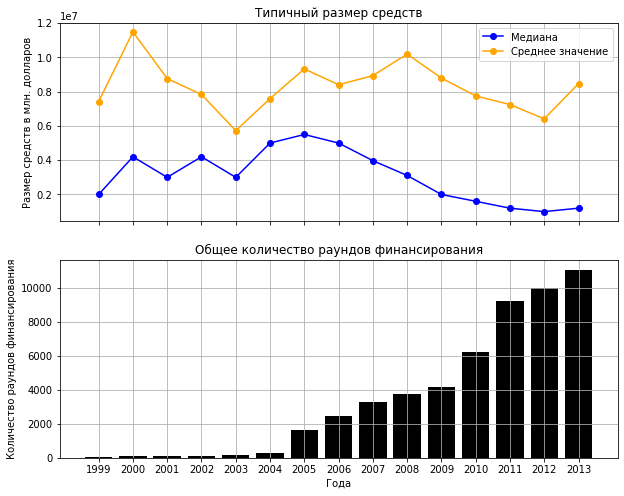

In [38]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)  # 2 строки, 1 столбец, общая ось X

# График 1: median и mean
axs[0].plot(filter_pivot_table.index, filter_pivot_table['median'], label='Медиана', color='blue', marker='o')
axs[0].plot(filter_pivot_table.index, filter_pivot_table['mean'], label='Среднее значение', color='orange', marker='o')
axs[0].set_title('Типичный размер средств')
axs[0].set_ylabel('Размер средств в млн. долларов')
axs[0].legend()
axs[0].grid()

# График 2: count
axs[1].bar(filter_pivot_table.index, filter_pivot_table['count'], color='black')
axs[1].set_title('Общее количество раундов финансирования')
axs[1].set_xlabel('Года')
axs[1].set_ylabel('Количество раундов финансирования')
axs[1].grid()

Типичный размер собранных средств в рамках одного раунда был максимален в 2005 году.

В 2013 году было проведено 11,072 раунда. Это довольно значительное количество, что может указывать на активность в инвестициях в стартапы в этом году.
Средний размер средств, выделяемых в рамках одного раунда, составил 8,467,284. Это значение показывает, что в 2013 году стартапы получали значительные суммы в рамках каждого раунда финансирования.
Если сравнить с предыдущими годами, можно заметить, что количество раундов в 2013 году значительно увеличилось по сравнению с предыдущими годами. Это может указывать на растущий интерес инвесторов к стартапам и более активное финансирование.
Средний размер средств в 2013 году также остается на высоком уровне, что может свидетельствовать о том, что инвесторы готовы выделять большие суммы на более зрелые или перспективные стартапы.

В 2013 году наблюдается рост активности в сфере венчурного капитала, как по количеству раундов, так и по среднему размеру средств, выделяемых в рамках каждого раунда. Это может быть связано с улучшением экономической ситуации, увеличением интереса к стартапам и ростом уверенности инвесторов в новых технологиях и бизнес-моделях.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [39]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [40]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [41]:
people_merge = pd.merge(people, education, left_on = 'id', right_on = 'person_id', how = 'left')
people_merge

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT


In [42]:
count_people_merge = people_merge.groupby('company_id').agg({
    'first_name': 'size',
    'instituition': 'nunique'
    
})
count_people_merge.reset_index()
count_people_merge['without_inst'] = count_people_merge['first_name'] - count_people_merge['instituition']
count_people_merge

,first_name,instituition,without_inst
company_id,,,
1.0,3,2,1
2.0,1,1,0
3.0,5,4,1
4.0,18,17,1
5.0,84,32,52
...,...,...,...
285897.0,2,2,0
285953.0,1,0,1
285972.0,2,1,1


In [43]:
count_people_merge['category'] = pd.cut(count_people_merge['first_name'], bins = [0, 1, 5, 20, 50, 200, 300], labels = ['initial_startup', 'microstart', 'small', 'medium', 'large', 'huge'])
count_people_merge

,first_name,instituition,without_inst,category
company_id,,,,
1.0,3,2,1,microstart
2.0,1,1,0,initial_startup
3.0,5,4,1,microstart
4.0,18,17,1,small
5.0,84,32,52,large
...,...,...,...,...
285897.0,2,2,0,microstart
285953.0,1,0,1,initial_startup
285972.0,2,1,1,microstart


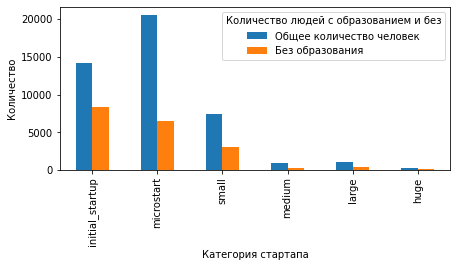

In [44]:
count_category = count_people_merge.groupby('category').agg({
    'first_name': 'sum',
    'without_inst': 'sum'
})
ax = count_category.plot(kind = 'bar',
                   figsize = (7, 3),
                   xlabel ='Категория стартапа',
                    ylabel = 'Количество'
                    )

labels = ['Общее количество человек', 'Без образования']
ax.legend(labels, title='Количество людей с образованием и без')

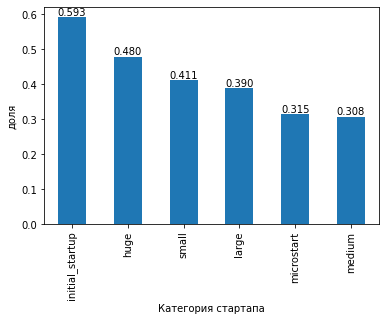

In [45]:
count_category['доля без образования'] = (count_category['without_inst'] / count_category['first_name'])

count_category_sorted = count_category['доля без образования'].sort_values(ascending = False)

ay = count_category_sorted.plot(kind = 'bar', xlabel ='Категория стартапа', ylabel = 'доля')

for index, value in enumerate(count_category_sorted):
    ay.text(index, value, f'{value:.3f}', ha='center', va='bottom')

In [46]:
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [47]:
degrees['object_id'] = degrees['object_id'].replace('p:', '', regex=True)
degrees.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


Обоснование выбора границ:
- initial_startup (0 - 1): Только созданный стартап с 1 человеком.
- Microstart (1 - 5): Эта категория включает стартапы с очень небольшим числом сотрудников. Это позволяет выделить стартапы, которые только начинают свой путь.
- Small (5 - 20): Стартапы в этой категории уже имеют небольшую команду и, возможно, начали привлекать финансирование. 
- Medium (20 - 50): Стартапы с числом сотрудников от 20 до 50 могут считаться более зрелыми. Позволяет выделить компании, которые достигли определенного уровня успеха и роста.
- Large (50 - 200): Стартапы в этой категории уже представляют собой значительные компании с более крупной командой и, вероятно, более сложной структурой. 
- Huge (200 - 300): Эта категория включает стартапы, которые достигли значительного размера и могут быть на пути к становлению крупными компаниями. Они могут иметь устойчивый бизнес и значительное влияние на рынок. Эта группа позволяет выделить наиболее успешные и крупные стартапы.


Общее количество человек в категории Microstart самоее наибольшее (более 30 000 человек) и это логично, потому что большинство предпринимателей начинают свои проекты в одиночку или с небольшой командой, что приводит к большому количеству таких компаний.

В категории initial_startup наблюдается наибольшая доля людей без образования — 59.3%. Это может указывать на то, что многие стартапы на начальной стадии часто привлекают людей с разным уровнем образования, и, возможно, в этой категории больше всего начинающих предпринимателей и работников, которые только начинают свою карьеру. В категории huge доля без образования составляет 48%. Это также довольно высокая доля, что может свидетельствовать о том, что в небольших стартапах также много людей, не имеющих формального образования, возможно, из-за гибкости в найме и акцента на навыках и опыте. В категории medium доля без образования составляет 30.08%.

Присоеденить таблицу degrees возможно. Однако стоило учесть, что в столбце был префикс "p:", который был успешно удален.


### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [48]:
# уникальные значения в столбце network_username
company_and_rounds_rename['network_username'].nunique()

79571

In [49]:
# уникальные значения в столбце network_username
people['network_username'].nunique()

38421

In [50]:
# уникальные значения в столбце network_username
fund['network_username'].nunique()

2098

In [51]:
# уникальные значения в столбце network_username
unique_counts = {
    'company_and_rounds_rename': company_and_rounds_rename['network_username'].nunique(),
    'people': people['network_username'].nunique(),
    'fund': fund['network_username'].nunique()
}
print(f'Количество уникальных значений столбца network_username в рахных датасетах')
unique_counts

Количество уникальных значений столбца network_username в рахных датасетах


{'company_and_rounds_rename': 79571, 'people': 38421, 'fund': 2098}

In [52]:
# Находим пересекающиеся значения company_and_rounds_rename['network_username'] и people['network_username']
intersection_company_people = set(company_and_rounds_rename['network_username']).intersection(set(people['network_username']))
len_intersection_company_people = len(intersection_company_people)
len_intersection_company_people

2200

In [53]:
total_union_company_people = len(set(company_and_rounds_rename['network_username']).union(set(people['network_username'])))
total_union_company_people

115794

In [54]:
intersecting_company_people = len_intersection_company_people / total_union_company_people
intersecting_company_people

0.018999257301760022

In [55]:
# Находим пересекающиеся значения company_and_rounds_rename['network_username'] и fund['network_username']
intersection_company_fund = set(company_and_rounds_rename['network_username']).intersection(set(fund['network_username']))
len_intersection_company_fund = len(intersection_company_fund)
len_intersection_company_fund

71

In [56]:
total_union_company_fund = len(set(company_and_rounds_rename['network_username']).union(set(fund['network_username'])))
total_union_company_fund

81600

In [57]:
intersecting_company_fund = len_intersection_company_fund / total_union_company_fund
intersecting_company_fund

0.0008700980392156863

Количество уникальных значений столбца network_username в рахных датасетах
{'company_and_rounds_rename': 79571, 'people': 38421, 'fund': 2098}

Для принятия решения о возможности объединения датасетов было принято решение провести анализ по доле уникальных значений.

Установлено, что чисто технически это сделать возможно, но доля пересечения уникальных значений столбца 'network_username' в датафреймах people и fund в датафрейме company_and_rounds очень маленькая и составляет всего 0.02 и 0.0009 соответственно. Это говорит нам о том, что при объединении будет потеряно колоссальное количество данных. 

Таким образом использовать столбцы с именем network_username для объединения данных лучше не стоит. 


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [58]:
company_and_rounds_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [59]:
company_and_rounds_rename.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'year'],
      dtype='object')

In [60]:
df_correct_сompany = company_and_rounds_rename[['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']]
df_correct_сompany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [61]:
df_correct_round = company_and_rounds_rename[['funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']]
df_correct_round.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id_2         52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 15.0+ MB


In [62]:
df_correct_сompany = df_correct_сompany.sort_values(by = 'company_id').reset_index(drop=True)
df_correct_сompany

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,2.0,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0.0,0.0,0.0,0.0
4,3.0,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_correct_round = df_correct_round.sort_values(by = 'company_id_2').reset_index(drop = True)
df_correct_round

,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,3503.0,4.0,2008-09-24,series-c+,28700000.0,0.0,4.0,0.0,0.0
4,24136.0,4.0,2011-07-12,series-c+,5000000.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
217770,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
217771,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
217772,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df_correct_round['company_id_2'].unique()

array([1.00000e+00, 4.00000e+00, 5.00000e+00, ..., 2.86200e+05,
       2.86215e+05,         nan])

In [65]:
df_correct_сompany['company_id'].unique()

array([1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 2.86213e+05,
       2.86215e+05,         nan])

In [66]:
df_correct_round_drop = df_correct_round.drop_duplicates(subset = 'company_id_2', keep = 'first')
df_correct_round_drop = df_correct_round_drop.dropna(how='all')
df_correct_round_drop['company_id_2'] = df_correct_round_drop['company_id_2'].astype('int')
df_correct_round_drop['participants'] = pd.to_numeric(df_correct_round_drop['participants'], downcast = 'integer')
df_correct_round_drop['is_first_round'] = pd.to_numeric(df_correct_round_drop['is_first_round'], downcast = 'integer')
df_correct_round_drop['is_last_round'] = pd.to_numeric(df_correct_round_drop['is_last_round'], downcast = 'integer')
df_correct_round_drop['funding_round_id'] = pd.to_numeric(df_correct_round_drop['funding_round_id'], downcast = 'integer')
df_correct_round_drop['funding_round_type'] = df_correct_round_drop['funding_round_type'].astype('category')
df_correct_round_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31939 entries, 0 to 52927
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     31939 non-null  int32         
 1   company_id_2         31939 non-null  int64         
 2   funded_at            31717 non-null  datetime64[ns]
 3   funding_round_type   31939 non-null  category      
 4   raised_amount        31939 non-null  float64       
 5   pre_money_valuation  31939 non-null  float64       
 6   participants         31939 non-null  int8          
 7   is_first_round       31939 non-null  int8          
 8   is_last_round        31939 non-null  int8          
dtypes: category(1), datetime64[ns](1), float64(2), int32(1), int64(1), int8(3)
memory usage: 1.5 MB


In [67]:
df_correct_сompany_drop = df_correct_сompany.drop_duplicates(subset = 'company_id', keep = 'first')
df_correct_сompany_drop = df_correct_сompany_drop.dropna(how='all')
df_correct_сompany_drop['company_id'] = df_correct_сompany_drop['company_id'].astype('int')
df_correct_сompany_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217471
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  int64         
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), 

При анализе базы данных company_and_rounds было установлено, что эти данные, возможно, были получены после некорректного объединения по какому-то из столбцов и поэтому у нас получился хаотичный датафрейм.

Сразу бросается в глаза столбцы 'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type', 'raised_amount', pre_money_valuation', 'participants', 'is_first_round' и 'is_last_round' своим количеством непустых значений - 52927. Из данных столбцов был создан датафрейм df_correct_round с информацией о раундах финансирования. Из полученного датафрейма df_correct_round были удалены все дубликаты по столбцу company_id_2, чтобы исключить все дубликаты компаний. Итогое число строк составило 31939. 

Оставшиеся столбцы включены в датафрейм df_correct_сompany_drop, так как это информация по компаниям. Также были обнаружены полностью пустые строки. Они также были исключены из итогового датасета. Итоговок количество строк в датафрейме df_correct_сompany_drop составило - 196553.


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [68]:
# Объединение датафреймов и выполнение фильтрации
df_correct = df_correct_сompany_drop.merge(df_correct_round_drop, left_on = 'company_id', right_on = 'company_id_2', how = 'left')
df_filter = df_correct[(df_correct['funding_rounds'] > 0) | (df_correct['investment_rounds'] > 0) | (df_correct['status'] == 'acquired')]
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 196552
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           40747 non-null  int64         
 1   name                 40747 non-null  object        
 2   category_code        35315 non-null  object        
 3   status               40747 non-null  object        
 4   founded_at           27807 non-null  datetime64[ns]
 5   closed_at            2128 non-null   datetime64[ns]
 6   domain               35754 non-null  object        
 7   network_username     20850 non-null  object        
 8   country_code         34742 non-null  object        
 9   investment_rounds    40747 non-null  float64       
 10  funding_rounds       40747 non-null  float64       
 11  funding_total        40747 non-null  float64       
 12  milestones           40747 non-null  float64       
 13  funding_round_id     31707 non

Датафрейм с инфомацией о раундах финансирования df_correct_round_drop присоединен к датафрейму df_correct_сompany_drop. После выполнения фильтрации "выберите только те компании, у которых указаны значения funding_rounds или investment_rounds больше нуля, или те, у которых в колонке status указано acquired" - итоговое количество строк получившегося датафрейма df_filter составило - 40747 строк.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

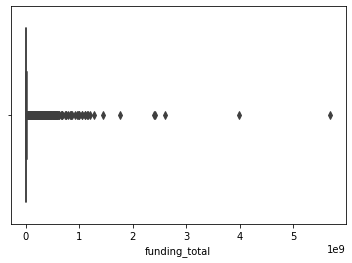

In [69]:
ax = sns.boxplot(x = df_filter['funding_total'])

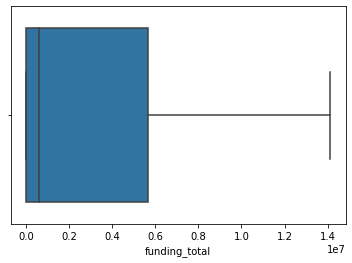

In [70]:
ay = sns.boxplot(x = df_filter['funding_total'], showfliers=False)

In [71]:
pd.options.display.float_format = '{:.0f}'.format
df_filter['funding_total'].describe()

count        40747
mean      10135610
std       56464360
min              0
25%              0
50%         600000
75%        5650650
max     5700000000
Name: funding_total, dtype: float64

Оценить графическим способом столбец funding_total не предоставляется возможным из-за наличия выбросов, которые мешают анализу. Это стоит учесть и прибегнуть к математическим спобособам определения выбросов. 

Статистические характеристики при использовании метода describe
- count: 40,747 — общее количество наблюдений.
- mean: 10,135,610 — среднее значение общего финансирования.
- std: 56,464,360 — стандартное отклонение, показывающее разброс значений.
- min: 0 — минимальное значение общего финансирования.
- 25% (Q1): 0 — первый квартиль, 25% компаний имеют финансирование 0 или меньше.
- 50% (Q2, медиана): 600,000 — медиана, 50% компаний имеют финансирование 600,000 или меньше.
- 75% (Q3): 5,650,650 — третий квартиль, 75% компаний имеют финансирование 5,650,650 или меньше.
- max: 5,700,000,000 — максимальное значение общего финансирования.

В данном случае среднее значение (10,135,610) может быть не очень информативным, поскольку оно сильно искажено выбросами (например, максимальное значение 5,700,000,000). Если в данных есть значительные выбросы, среднее может не отражать типичное значение. Медиана (600,000) является более надежным показателем типичного значения в данном случае, так как она не подвержена влиянию выбросов. Она показывает, что половина компаний имеет финансирование ниже 600,000. Первый (0) и третий (5,650,650) квартиль также полезны для понимания распределения данных. Они показывают, что 25% компаний не получили финансирования, а 75% компаний получили финансирование менее 5,650,650.

В данном случае, для оценки типичных значений лучше использовать медиану и квартильные значения, чем среднее, из-за наличия выбросов и значительного разброса в данных. Медиана и квартильные значения дают более точное представление о распределении финансирования среди компаний.


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [72]:
acquisition['price_amount'].sort_values().unique()

array([            0,             1,            11, ...,   35000000000,
         39000000000, 2600000000000])

In [73]:
df_filter_zero_one = df_filter.merge(acquisition, left_on = 'company_id', right_on = 'acquired_company_id', how = 'left')

In [74]:
df_filter_zero_one = df_filter_zero_one.loc[((df_filter_zero_one['price_amount'] == 0) | (df_filter_zero_one['price_amount'] == 1)) & 
    (df_filter_zero_one['funding_total'] > 0)
]

In [75]:
for column in df_filter_zero_one.columns:
    print(f'Уникальные значения в столбце {column}:')
    print(df_filter_zero_one[column].sort_values().unique())

Уникальные значения в столбце company_id:
[     9     13     14 ... 261146 266567 268806]
Уникальные значения в столбце name:
['#waywire' '1000 Markets' '1000memories' ... 'wunderloop' 'youcalc'
 'zoidu']
Уникальные значения в столбце category_code:
['advertising' 'analytics' 'automotive' 'biotech' 'cleantech' 'consulting'
 'design' 'ecommerce' 'education' 'enterprise' 'fashion' 'finance'
 'games_video' 'hardware' 'health' 'hospitality' 'legal' 'manufacturing'
 'medical' 'messaging' 'mobile' 'music' 'network_hosting' 'news' 'other'
 'photo_video' 'public_relations' 'search' 'security' 'semiconductor'
 'social' 'software' 'sports' 'transportation' 'travel' 'web' nan]
Уникальные значения в столбце status:
['acquired']
Уникальные значения в столбце founded_at:
['1968-01-01T00:00:00.000000000' '1974-01-01T00:00:00.000000000'
 '1976-01-01T00:00:00.000000000' '1979-01-01T00:00:00.000000000'
 '1980-01-01T00:00:00.000000000' '1981-01-01T00:00:00.000000000'
 '1982-01-01T00:00:00.000000000' '198

In [76]:
df_filter_zero_one

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,pre_money_valuation,participants,is_first_round,is_last_round,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
5,9,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0,...,8500000,1,0,1,7954,687,9,NaN,0,2012-11-28
9,13,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0,...,0,6,0,0,4283,20,13,NaN,0,2007-05-30
11,14,Gizmoz,web,acquired,2003-01-01,NaT,gizmoz.com,NaN,USA,0,...,0,2,1,0,2692,37730,14,NaN,0,2009-12-15
19,23,Joost,games_video,acquired,2006-10-01,NaT,joost.com,NaN,USA,0,...,0,3,1,1,2622,3396,23,NaN,0,2009-11-24
32,38,Kyte,games_video,acquired,2006-12-01,NaT,kyte.com,kyte,USA,0,...,0,1,1,0,5075,475,38,NaN,0,2011-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37230,259939,Pluromed,hardware,acquired,2003-01-01,NaT,pluromed.com,NaN,USA,0,...,0,0,0,1,9527,28373,259939,NaN,0,2012-03-16
37247,260008,Rhetorical Group plc,NaN,acquired,2002-01-01,NaT,NaN,NaN,NaN,0,...,0,1,1,1,9631,237526,260008,NaN,0,2004-01-01
37413,261146,Endurance Lending Network,finance,acquired,2011-12-01,NaT,enduranceln.com,EnduranceLN,USA,0,...,0,5,1,1,10166,43210,261146,stock,0,2013-10-25
38108,266567,WiiiWaaa,web,acquired,NaT,NaT,wiiiwaaa.com,wiiiwaaa,NaN,0,...,0,0,1,1,9066,236079,266567,cash,0,2000-05-01


In [77]:
#Общее количество оличество компаний за 0 и 1
num_companies = df_filter_zero_one.shape[0]
num_companies

1618

In [78]:
#Количество компаний за 0 и 1 доллар
df_filter_zero_one['price_amount'].value_counts()

0    1618
Name: price_amount, dtype: int64

Text(0.5, 1.0, 'Тепловая карта по количеству нулевых покупок в зависимости от категории области деятельности компании')

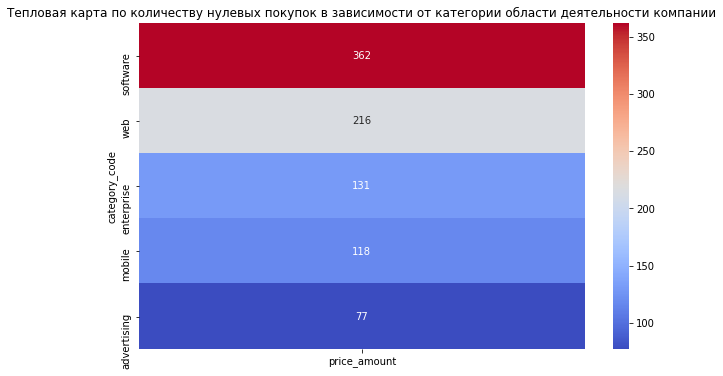

In [79]:
count_category_code = df_filter_zero_one.groupby('category_code')['price_amount'].count().sort_values(ascending = False).reset_index().set_index('category_code').head(5)
plt.figure(figsize=(10, 6))
sns.heatmap(count_category_code[['price_amount']], annot=True, fmt = '.0f', cmap = 'coolwarm')
plt.title('Тепловая карта по количеству нулевых покупок в зависимости от категории области деятельности компании')

Text(0.5, 1.0, 'Тепловая карта по количеству нулевых покупок в зависимости от типа финансирования')

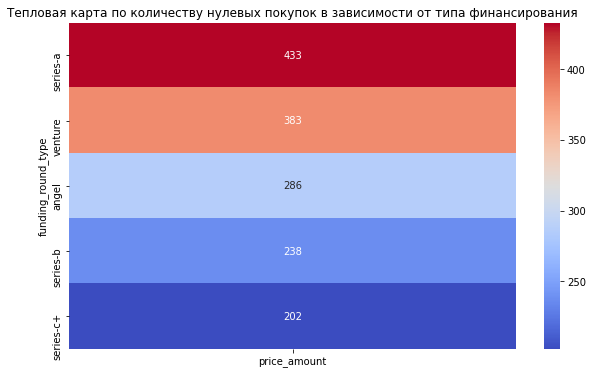

In [80]:
count_funding_round_type = df_filter_zero_one.groupby('funding_round_type')['price_amount'].count().sort_values(ascending = False).reset_index().set_index('funding_round_type').head(5)
plt.figure(figsize=(10, 6))
sns.heatmap(count_funding_round_type[['price_amount']], annot=True, fmt = '.0f', cmap = 'coolwarm')
plt.title('Тепловая карта по количеству нулевых покупок в зависимости от типа финансирования')

In [81]:
df_filter_zero_one['funding_total'].describe()

count         1618
mean      18152962
std      144503027
min           3750
25%        2000000
50%        6000000
75%       15500000
max     5700000000
Name: funding_total, dtype: float64

<AxesSubplot:xlabel='funding_total'>

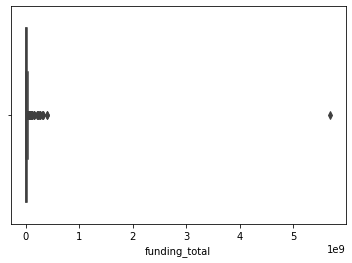

In [82]:
sns.boxplot(x = df_filter_zero_one['funding_total'])

In [83]:
# Расчет квартилей
Q1 = df_filter_zero_one['funding_total'].quantile(0.25)
Q3 = df_filter_zero_one['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Расчет границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Нижняя граница выбросов: {lower_bound}')
print(f'Верхняя граница выбросов: {upper_bound}')

Нижняя граница выбросов: -18250000.0
Верхняя граница выбросов: 35750000.0


In [84]:
# Определение процентилей для границ
lower_percentile = df_filter_zero_one['funding_total'].quantile(0.01)  # 1-й процентиль
upper_percentile = df_filter_zero_one['funding_total'].quantile(0.99)  # 99-й процентиль

print(f'Нижняя граница соответствует {lower_percentile * 100:.2f} процентилю')
print(f'Верхняя граница соответствует {upper_percentile * 100:.2f} процентилю')

Нижняя граница соответствует 2000000.00 процентилю
Верхняя граница соответствует 15155293000.00 процентилю


Найдено всего 1618 компаний, которые были проданы за ноль долларов при условии, что у них был ненулевой общий объём финансирования. Первое место по количеству покупок нулевых компаний занимает категория software - 362 покупки. Тогда как в зависимости от типа финансирования - 433 (series-a).


Нижняя граница выбросов:
 - Значение -18250000.0 является крайне низким и не соответствует реальным данным, так как в большинстве случаев значения финансирования не могут быть отрицательными. Это может указывать на то, что в данных присутствуют аномалии или ошибки, которые следует исправить.
 - Соответствие нижней границы 2000000.00 процентилю также вызывает вопросы, так как это значение значительно ниже, чем большинство наблюдаемых значений в вашем наборе данных. Это может означать, что нижняя граница выбросов не является адекватной для замены.
Верхняя граница выбросов:
 - Значение 35750000.0 для верхней границы выбросов может быть более приемлемым, однако его соответствие 15155293000.00 процентилю указывает на то, что это значение также выходит за пределы наблюдаемых данных. Это может означать, что в данных есть экстремальные выбросы, которые не отражают реальную ситуацию.
 
- Если верхняя граница выбросов соответствует такому высокому процентилю, это может указывать на то, что в данных есть значительное количество аномально высоких значений, которые могут быть результатом ошибок или специфических обстоятельств.


Замена выбросов на значения по процентилям:
- Не имеет смысла использовать значение -18250000.0. Вместо этого можно рассмотреть использование 1-го процентиля (2000000) для замены.
- Значение 35750000.0 может быть слишком высоким, учитывая, что оно соответствует высокому процентилю. Рекомендуется заменить его на 99-й процентиль (например, 15500000) или на максимальное значение.


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [85]:
df_category = df_filter.loc[df_filter['funding_total'] != 0]
df_category_sort = df_category.groupby('category_code').agg(
    median=('funding_total', 'median'),
    std=('funding_total', 'std')
)
df_category_sort.sort_values(by = 'std', ascending = False).head(3)

,median,std
category_code,,
automotive,2825340,200143944
mobile,1750000,165615074
social,500000,119027789


In [86]:
df_category_sort.sort_values(by = 'median', ascending = False).head(3)

,median,std
category_code,,
semiconductor,12850000,43537545
cleantech,9000000,98191088
nanotech,7500000,99650533


Выбор количества категорий (топ-3):
- Выбор небольшого числа категорий (например, топ-3) позволяет сосредоточиться на наиболее значимых данных, что упрощает анализ и делает его более понятным.

Выбор методов расчета:
- Стандартное отклонение (std) показывает разброс цен в каждой категории. Высокое стандартное отклонение указывает на значительные различия в ценах, что может быть признаком высокой волатильности и потенциальных рисков, но также и возможностей для инвестирования.
- Максимальная цена позволяет выявить экстремальные значения в каждой категории, что может быть важно для инвесторов, которые ищут стартапы с высоким потенциалом роста.
- Средняя цена дает общее представление о стоимости стартапов в каждой категории. Это полезно для понимания, насколько высокие или низкие цены в сравнении с другими категориями.

Наибольшими значениями обладают следующие категории:
1. semiconductor
2. cleantech
3. nanotech

Наибольшим разбросом:
1. automotive
2. mobile
3. social


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [87]:
df_status = df_filter.groupby('status')['funding_rounds'].median()
df_status

status
acquired    0
closed      1
ipo         1
operating   1
Name: funding_rounds, dtype: float64

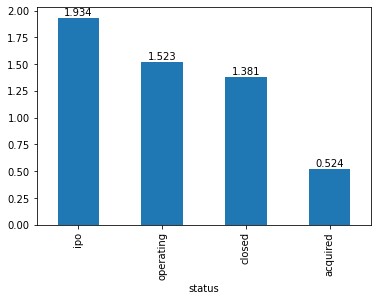

In [88]:
ae = df_filter.groupby('status')['funding_rounds'].mean().sort_values(ascending = False).plot(kind = 'bar')

value = df_filter.groupby('status')['funding_rounds'].mean().sort_values(ascending = False)

for index, value in enumerate(value):
    ae.text(index, value, f'{value:.3f}', ha='center', va='bottom')

In [89]:
df_filter.groupby('status')['funding_rounds'].mean()

status
acquired    1
closed      1
ipo         2
operating   2
Name: funding_rounds, dtype: float64

Для стартапов в данной выборке типичное количество раундов финансирования составляет 1. Это говорит о том, что большинство стартапов, независимо от статуса, привлекли один раунд финансирования. Заказчику стоит обратить внимание на стартапы со статусом "acquired", так как они не привлекли финансирование, что может быть как положительным, так и отрицательным знаком. Также стоит рассмотреть возможность дальнейшего анализа стартапов с одним раундом финансирования, чтобы понять, почему они не привлекли больше инвестиций и как это влияет на их успех.

Стартапы со статусом "acquired" имеют наименьшее среднее количество раундов финансирования (0.524). Это может указывать на то, что такие стартапы часто не нуждаются в значительном внешнем финансировании перед приобретением.
Стартапы со статусом "ipo" имеют наибольшее среднее количество раундов (1.934). Это говорит о том, что успешные стартапы, которые смогли выйти на биржу, обычно привлекают больше инвестиций, что позволяет им развиваться и расти.



## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

Вывод:
*Раунды финансирования по годам*

Типичный размер собранных средств в рамках одного раунда был максимален в 2005 году.
В 2013 году было проведено 11,072 раунда. Это довольно значительное количество, что может указывать на активность в инвестициях в стартапы в этом году. Средний размер средств, выделяемых в рамках одного раунда, составил 8,467,284. Это значение показывает, что в 2013 году стартапы получали значительные суммы в рамках каждого раунда финансирования. Если сравнить с предыдущими годами, можно заметить, что количество раундов в 2013 году значительно увеличилось по сравнению с предыдущими годами. Это может указывать на растущий интерес инвесторов к стартапам и более активное финансирование. Средний размер средств в 2013 году также остается на высоком уровне, что может свидетельствовать о том, что инвесторы готовы выделять большие суммы на более зрелые или перспективные стартапы.
В 2013 году наблюдается рост активности в сфере венчурного капитала, как по количеству раундов, так и по среднему размеру средств, выделяемых в рамках каждого раунда. Это может быть связано с улучшением экономической ситуации, увеличением интереса к стартапам и ростом уверенности инвесторов в новых технологиях и бизнес-моделях.

*Люди и их образование*

Обоснование выбора границ:
- initial_startup (0 - 1): Только созданный стартап с 1 человеком.
- Microstart (1 - 5): Эта категория включает стартапы с очень небольшим числом сотрудников. Это позволяет выделить стартапы, которые только начинают свой путь.
- Small (5 - 20): Стартапы в этой категории уже имеют небольшую команду и, возможно, начали привлекать финансирование.
- Medium (20 - 50): Стартапы с числом сотрудников от 20 до 50 могут считаться более зрелыми. Позволяет выделить компании, которые достигли определенного уровня успеха и роста.
- Large (50 - 200): Стартапы в этой категории уже представляют собой значительные компании с более крупной командой и, вероятно, более сложной структурой.
- Huge (200 - 300): Эта категория включает стартапы, которые достигли значительного размера и могут быть на пути к становлению крупными компаниями. Они могут иметь устойчивый бизнес и значительное влияние на рынок. Эта группа позволяет выделить наиболее успешные и крупные стартапы.
Общее количество человек в категории Microstart самоее наибольшее (более 30 000 человек) и это логично, потому что большинство предпринимателей начинают свои проекты в одиночку или с небольшой командой, что приводит к большому количеству таких компаний.
В категории microstart наблюдается наибольшая доля людей без образования — 38.44%. Это может указывать на то, что многие стартапы на начальной стадии часто привлекают людей с разным уровнем образования, и, возможно, в этой категории больше всего начинающих предпринимателей и работников, которые только начинают свою карьеру. В категории small доля без образования составляет 31.28%. Это также довольно высокая доля, что может свидетельствовать о том, что в небольших стартапах также много людей, не имеющих формального образования, возможно, из-за гибкости в найме и акцента на навыках и опыте. В категории huge доля без образования составляет 18.10%. Хотя эта доля немного выше, чем в категории large, она все равно остается ниже, чем в категориях microstart и small.

Присоеденить таблицу degrees возможно. Однако стоило учесть, что в столбце был префикс "p:", который был успешно удален.

Количество уникальных значений столбца network_username в рахных датасетах {'company_and_rounds_rename': 79571, 'people': 38421, 'fund': 2098}
Для принятия решения о возможности объединения датасетов было принято решение провести анализ по доле уникальных значений.
Установлено, что чисто технически это сделать возможно, но доля пересечения уникальных значений столбца 'network_username' в датафреймах people и fund в датафрейме company_and_rounds очень маленькая и составляет всего 0.02 и 0.0009 соответственно. Это говорит нам о том, что при объединении будет потеряно колоссальное количество данных.
Таким образом использовать столбцы с именем network_username для объединения данных лучше не стоит.


При анализе базы данных company_and_rounds было установлено, что эти данные, возможно, были получены после некорректного объединения по какому-то из столбцов и поэтому у нас получился хаотичный датафрейм. Сразу бросается в глаза столбцы 'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type', 'raised_amount', pre_money_valuation', 'participants', 'is_first_round' и 'is_last_round' своим количеством непустых значений - 52927. Из данных столбцов был создан датафрейм df_correct_round с информацией о раундах финансирования. Из полученного датафрейма df_correct_round были удалены все дубликаты по столбцу company_id_2, чтобы исключить все дубликаты компаний. Итогое число строк составило 31939. Оставшиеся столбцы включены в датафрейм df_correct_сompany_drop, так как это информация по компаниям. Также были обнаружены полностью пустые строки. Они также были исключены из итогового датасета. Итоговок количество строк в датафрейме df_correct_сompany_drop составило - 196553.

Датафрейм с инфомацией о раундах финансирования df_correct_round_drop присоединен к датафрейму df_correct_сompany_drop. После выполнения фильтрации "выберите только те компании, у которых указаны значения funding_rounds или investment_rounds больше нуля, или те, у которых в колонке status указано acquired" - итоговое количество строк получившегося датафрейма df_filter составило - 40747 строк.


Оценить графическим способом столбец funding_total не предоставляется возможным из-за наличия выбросов, которые мешают анализу. Это стоит учесть и прибегнуть к математическим спобособам определения выбросов.

Статистические характеристики при использовании метода describe

- count: 40,747 — общее количество наблюдений.
- mean: 10,135,610 — среднее значение общего финансирования.
- std: 56,464,360 — стандартное отклонение, показывающее разброс значений.
- min: 0 — минимальное значение общего финансирования.
- 25% (Q1): 0 — первый квартиль, 25% компаний имеют финансирование 0 или меньше.
- 50% (Q2, медиана): 600,000 — медиана, 50% компаний имеют финансирование 600,000 или меньше.
- 75% (Q3): 5,650,650 — третий квартиль, 75% компаний имеют финансирование 5,650,650 или меньше.
- max: 5,700,000,000 — максимальное значение общего финансирования.

В данном случае среднее значение (10,135,610) может быть не очень информативным, поскольку оно сильно искажено выбросами (например, максимальное значение 5,700,000,000). Если в данных есть значительные выбросы, среднее может не отражать типичное значение. Медиана (600,000) является более надежным показателем типичного значения в данном случае, так как она не подвержена влиянию выбросов. Она показывает, что половина компаний имеет финансирование ниже 600,000. Первый (0) и третий (5,650,650) квартиль также полезны для понимания распределения данных. Они показывают, что 25% компаний не получили финансирования, а 75% компаний получили финансирование менее 5,650,650.

В данном случае, для оценки типичных значений лучше использовать медиану и квартильные значения, чем среднее, из-за наличия выбросов и значительного разброса в данных. Медиана и квартильные значения дают более точное представление о распределении финансирования среди компаний.

Найдено всего 1618 компаний, которые были проданы за ноль долларов при условии, что у них был ненулевой общий объём финансирования. Первое место по количеству покупок нулевых компаний занимает категория software - 362 покупки. Тогда как в зависимости от типа финансирования - 433 (series-a).

Нижняя граница выбросов:

- Значение -18250000.0 является крайне низким и не соответствует реальным данным, так как в большинстве случаев значения финансирования не могут быть отрицательными. Это может указывать на то, что в данных присутствуют аномалии или ошибки, которые следует исправить.
Соответствие нижней границы 2000000.00 процентилю также вызывает вопросы, так как это значение значительно ниже, чем большинство наблюдаемых значений в вашем наборе данных. Это может означать, что нижняя граница выбросов не является адекватной для замены. Верхняя граница выбросов:
- Значение 35750000.0 для верхней границы выбросов может быть более приемлемым, однако его соответствие 15155293000.00 процентилю указывает на то, что это значение также выходит за пределы наблюдаемых данных. Это может означать, что в данных есть экстремальные выбросы, которые не отражают реальную ситуацию.
Если верхняя граница выбросов соответствует такому высокому процентилю, это может указывать на то, что в данных есть значительное количество аномально высоких значений, которые могут быть результатом ошибок или специфических обстоятельств.
Замена выбросов на значения по процентилям:

Не имеет смысла использовать значение -18250000.0. Вместо этого можно рассмотреть использование 1-го процентиля (2000000) для замены.
Значение 35750000.0 может быть слишком высоким, учитывая, что оно соответствует высокому процентилю. Рекомендуется заменить его на 99-й процентиль (например, 15500000) или на максимальное значение.

Выбор количества категорий (топ-3):

Выбор небольшого числа категорий (например, топ-3) позволяет сосредоточиться на наиболее значимых данных, что упрощает анализ и делает его более понятным.
Выбор методов расчета:

- Стандартное отклонение (std) показывает разброс цен в каждой категории. Высокое стандартное отклонение указывает на значительные различия в ценах, что может быть признаком высокой волатильности и потенциальных рисков, но также и возможностей для инвестирования.
- Максимальная цена позволяет выявить экстремальные значения в каждой категории, что может быть важно для инвесторов, которые ищут стартапы с высоким потенциалом роста.
- Средняя цена дает общее представление о стоимости стартапов в каждой категории. Это полезно для понимания, насколько высокие или низкие цены в сравнении с другими категориями.

Наибольшими значениями обладают следующие категории:

- semiconductor
- cleantech
- nanotech

Наибольшим разбросом:

- automotive
- mobile
- social

Для стартапов в данной выборке типичное количество раундов финансирования составляет 1. Это говорит о том, что большинство стартапов, независимо от статуса, привлекли один раунд финансирования. Заказчику стоит обратить внимание на стартапы со статусом "acquired", так как они не привлекли финансирование, что может быть как положительным, так и отрицательным знаком. Также стоит рассмотреть возможность дальнейшего анализа стартапов с одним раундом финансирования, чтобы понять, почему они не привлекли больше инвестиций и как это влияет на их успех.

Стартапы со статусом "acquired" имеют наименьшее среднее количество раундов финансирования (0.524). Это может указывать на то, что такие стартапы часто не нуждаются в значительном внешнем финансировании перед приобретением.
Стартапы со статусом "ipo" имеют наибольшее среднее количество раундов (1.934). Это говорит о том, что успешные стартапы, которые смогли выйти на биржу, обычно привлекают больше инвестиций, что позволяет им развиваться и расти.

Рекомендации:

Учитывая, что в категории initial_startup наблюдается наибольшая доля людей без образования — 59.3%. Это может указывать на то, что многие стартапы на начальной стадии часто привлекают людей с разным уровнем образования, и, возможно, в этой категории больше всего начинающих предпринимателей и работников, которые только начинают свою карьеру. В категории huge доля без образования составляет 48 %, стоит рассмотреть программы обучения и развития для сотрудников. Это может повысить квалификацию команды и улучшить шансы на успех стартапа.

Semiconductor, Cleantech, Nanotech: Эти категории имеют наибольшие средние цены, что может указывать на высокий потенциал роста и прибыльности. Рекомендуется рассмотреть возможность увеличения инвестиций в стартапы из этих категорий, так как они могут предложить значительные возвраты на инвестиции. Automotive, Mobile, Social: Высокий разброс цен в этих категориях может указывать на значительную волатильность и риски. Рекомендуется провести более глубокий анализ факторов, способствующих этому разбросу, чтобы лучше понять, какие стартапы имеют высокий потенциал, а какие могут быть более рискованными.

В среднем стартапы, которые находятся в статусе "ipo", проходят больше всего раундов финансирования, что может быть связано с их успешной бизнес-моделью и способностью привлекать инвестиции.
Заказчику стоит обратить внимание на стартапы со статусом "closed", так как они имеют среднее количество раундов, близкое к 1. Это может указывать на необходимость анализа причин закрытия и возможности улучшения их бизнес-моделей. Также стоит рассмотреть стартапы со статусом "acquired" для понимания их успешных стратегий, которые позволили им быть приобретенными без значительного финансирования.